In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns
import re
import statsmodels.api as sm
import datetime as dt
import seaborn as sns
import scipy.stats as st
import scipy
from scipy.stats import chi2_contingency
from functions import plot_dendrogram
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import datasets
from functions import *
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.stats import ks_2samp
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [2]:
df = pd.read_csv('openfoodfacts.products.csv', sep='\t', low_memory=False)
df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [3]:
df = df.drop_duplicates()
df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [4]:
df.isna().sum()

code                                              23
url                                               23
creator                                            2
created_t                                          3
created_datetime                                   9
last_modified_t                                    0
last_modified_datetime                             0
product_name                                   17762
generic_name                                  267977
quantity                                      215953
packaging                                     241812
packaging_tags                                241811
brands                                         28412
brands_tags                                    28420
categories                                    236362
categories_tags                               236383
categories_fr                                 236361
origins                                       298582
origins_tags                                  

In [5]:
df.describe(include='all')

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,320749,320749,320770,320769,320763,320772,320772,303010,52795,104819,78960,78961,292360,292352,84410,84389,84411,22190,22153,36501,36495,46559,46644,46666,29306,29303,18803,23,20320,58193,51722,320492,320492,320492,248962,28344,19,24353,24329,24352,211331,0.0,248939.000000,248905,154680,154680,248939.000000,0.0,4835,248939.000000,0.0,11696,0.0,221210,91513,94491,320726,320726,320726,84366,84366,75836,75836,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268

In [6]:
df.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

# Suppression des valeurs abérantes 

In [7]:
# select the numeric columns
df_num = df._get_numeric_data()
df_num

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,0.0,NaN,0.0,NaN,NaN,2243.0,NaN,28.57,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.018,64.29,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.57,NaN,NaN,NaN,0.00000,0.000,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,NaN,0.0,0.0,NaN,0.0,NaN,NaN,1941.0,NaN,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,60.71,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.63500,0.250,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,NaN,0.0,0.0,NaN,0.0,NaN,NaN,2540.0,NaN,57.14,5.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.86,3.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,1.22428,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,NaN,0.0,0.0,NaN,0.0,NaN,NaN,1552.0,NaN,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
# replace all the negatives values with nan
df_nan = df_num.copy()
df_nan[df_nan < 0] = np.nan

In [9]:
# select all the columns where data can't be over 100 - fields that end with _100g correspond to the amount of a nutriment
num_ok_nan_100 = df_nan.filter(like='_100g')
num_ok_nan_100

,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2243.0,NaN,28.57,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.018,64.29,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.57,NaN,NaN,NaN,0.00000,0.000,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,1941.0,NaN,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,60.71,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.63500,0.250,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,2540.0,NaN,57.14,5.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.86,3.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,1.22428,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,1552.0,NaN,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [10]:
# drop energy columns that can be in Kj and other mesures that can be upper 100 for 100g
num_ok_nan_g = num_ok_nan_100.drop(['carbon-footprint_100g','energy-from-fat_100g','energy_100g'], axis=1)
num_ok_nan_g

,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.57,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.018,64.29,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.57,NaN,NaN,NaN,0.00000,0.000,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,60.71,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.63500,0.250,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,57.14,5.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.86,3.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,1.22428,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

#### df_num with all the rows that contain a value >100 dropped

##### First method
df_test = num_ok_nan_100.copy()  
df_test = df_test[df_test[df_test > 100].any(axis=1) == False]  
df_test.describe()  

##### Second method
df_test_s = num_ok_nan_100.copy()  
l_col= df_test_s.columns  
for c in l_col:  
    df_test_s.drop(df_test_s[df_test_s[c]>=100].index,inplace=True)  
for c in l_col:  
    df_test_s.drop(df_test_s[df_test_s[c]>=100].index,inplace=True)  

In [11]:
# drop all the values > 100 and replace with nan
num_ok_nan_clean = num_ok_nan_g[num_ok_nan_g < 100]
num_ok_nan_clean

,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.57,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.018,64.29,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.57,NaN,NaN,NaN,0.00000,0.000,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,60.71,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.63500,0.250,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,57.14,5.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.86,3.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,1.22428,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [12]:
# exclude satured_fat and carbohydrate that are respectively included into Fat and Sugar
num_ok_nan = num_ok_nan_clean.copy()
num_ok_nan = num_ok_nan.drop(['carbohydrates_100g','saturated-fat_100g'], axis=1)
num_ok_nan

,fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.018,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.57,NaN,NaN,NaN,0.00000,0.000,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.63500,0.250,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,57.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,1.22428,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [13]:
# drop all the rows that have a total > 100  
num_ok_nan['Total'] = num_ok_nan.sum(axis=1)
num_ok_nan.drop(num_ok_nan[num_ok_nan['Total'] >= 100].index, inplace=True)
num_ok_nan

,fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,Total
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
1,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.018,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.57,NaN,NaN,NaN,0.000,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,78.07069
2,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.635,0.25,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,61.63729
4,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.70000
5,18.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.7,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038,NaN,0.00346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.01146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [14]:
# drop the column Total 
num_ok_nan = num_ok_nan.drop(['Total'], axis=1)

num_ok_nan = num_ok_nan_clean without total > 100  
num_ok_nan_clean = df_nan without > 100  
df_nan = df numeric without negatives values   

## Jointure des colonnes pour constitution du dataframe cleané 

In [15]:
# suppression des colonnes total > 100 pour jointure sur les colonnes > 100
df_ok_100 = num_ok_nan_clean.drop(num_ok_nan.columns, axis=1)
df_ok_100

,saturated-fat_100g,carbohydrates_100g
0,NaN,NaN
1,28.57,64.29
2,0.00,60.71
3,5.36,17.86
4,NaN,77.14
...,...,...
320767,NaN,NaN
320768,0.00,0.00
320769,NaN,NaN
320770,NaN,NaN


In [16]:
# suppression des colonnes > 100 pour jointure sur toutes les colonnes numériques positives
df_ok_positiv = df_nan.drop(num_ok_nan_clean.columns, axis=1)
df_ok_positiv

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,carbon-footprint_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,0.0,NaN,0.0,NaN,NaN,2243.0,NaN,NaN
2,NaN,0.0,0.0,NaN,0.0,NaN,NaN,1941.0,NaN,NaN
3,NaN,0.0,0.0,NaN,0.0,NaN,NaN,2540.0,NaN,NaN
4,NaN,0.0,0.0,NaN,0.0,NaN,NaN,1552.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN
320769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Jointure de toutes les colonnes > 100
df_nan_j = num_ok_nan.merge(df_ok_100 ,left_index = True, right_index = True, how='left')
df_nan_j

,fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,saturated-fat_100g,carbohydrates_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.018,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.57,NaN,NaN,NaN,0.000,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,28.57,64.29
2,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.635,0.25,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.00,60.71
4,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.14
5,18.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.7,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038,NaN,0.00346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,63.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [18]:
# Jointure de toutes les colonnes numeriques positives
df_nan_num = df_nan_j.merge(df_ok_positiv ,left_index = True, right_index = True, how='left')
df_nan_num

,fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,saturated-fat_100g,carbohydrates_100g,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,carbon-footprint_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.018,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.57,NaN,NaN,NaN,0.000,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,28.57,64.29,NaN,0.0,0.0,NaN,0.0,NaN,NaN,2243.0,NaN,NaN
2,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.635,0.25,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.00,60.71,NaN,0.0,0.0,NaN,0.0,NaN,NaN,1941.0,NaN,NaN
4,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.14,NaN,0.0,0.0,NaN,0.0,NaN,NaN,1552.0,NaN,NaN
5,18.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.7,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038,NaN,0.00346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [19]:
df_string = df.select_dtypes(include=[object])
df_string

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,additives,additives_tags,additives_fr,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,NaN,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,NaN,NaN,NaN,28 g (0.25 cup),[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,NaN,NaN,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN,NaN,NaN,NaN,28 g (0.25 cup),[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,NaN,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,Organic polenta,NaN,NaN,NaN,NaN,NaN,35 g (0.25 cup),[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [20]:
# Jointure avec toutes les autres colonnes, y compris non numériques
df_nan = df_nan_num.merge(df_string ,left_index = True, right_index = True, how='left')
df_nan

,fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,saturated-fat_100g,carbohydrates_100g,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,carbon-footprint_100g,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,additives,additives_tags,additives_fr,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN
1,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.018,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.57,NaN,NaN,NaN,0.000,0.00,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,28.57,64.29,NaN,0.0

In [21]:
# count the nan of all the float columnns
df_nan.isna().sum()

fat_100g                                       76460
butyric-acid_100g                             272499
caproic-acid_100g                             272499
caprylic-acid_100g                            272498
capric-acid_100g                              272498
lauric-acid_100g                              272497
myristic-acid_100g                            272498
palmitic-acid_100g                            272498
stearic-acid_100g                             272498
arachidic-acid_100g                           272476
behenic-acid_100g                             272476
lignoceric-acid_100g                          272499
cerotic-acid_100g                             272499
montanic-acid_100g                            272498
melissic-acid_100g                            272499
monounsaturated-fat_100g                      256879
polyunsaturated-fat_100g                      256825
omega-3-fat_100g                              271855
alpha-linolenic-acid_100g                     

In [22]:
# drop the columns with too much NaN
df_all = df_nan.copy()
df_nan_all = df_all.dropna(axis='columns', thresh=100000)
df_nan_all

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,saturated-fat_100g,carbohydrates_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives,additives_tags,additives_fr,nutrition_grade_fr,states,states_tags,states_fr
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com..."
1,28.57,0.0,0.018,14.29,3.6,3.57,0.000,0.00,0.0,0.0214,0.000,0.00129,14.0,14.0,28.57,64.29,0.0,0.0,0.0,2243.0,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
2,17.86,0.0,0.000,17.86,7.1,17.86,0.635,0.25,0.0,0.0000,0.071,0.00129,0.0,0.0,0.00,60.71,0.0,0.0,0.0,1941.0,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
4,1.43,NaN,NaN,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.14,0.0,0.0,0.0,1552.0,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,Organic polenta,35 g (0.25 cup),[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
5,18.27,NaN,NaN,11.54,7.7,13.46,NaN,NaN,NaN,NaN,0.038,0.00346,NaN,NaN,1.92,63.46,0.0,0.0,0.0,1933.0,0000000016100,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,unfi,US,en:united-states,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),[ rolled-oats -> en:rolled-oats ] [ oats ->...,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,panzani,en:RO,en:romania,Roumanie,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c..."

df_nan_all = df_nan.copy()

# Remplissage des valeurs manquantes

In [23]:
# clean dataframe with nan values
df_outliers = df_nan_all.copy()

# numeric data with nan values
df_outliers_num = df_outliers._get_numeric_data()

# clean dataframe with 0 values
df_outliers_0 = df_nan_all.fillna(0)

# numeric data with 0 values
df_outliers_num0 = df_outliers_0._get_numeric_data()

### A) Par la moyenne

In [24]:
df_mean = df_outliers_num.fillna(df_outliers_num.mean())
df_mean

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,saturated-fat_100g,carbohydrates_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g
0,7.849893,0.048814,0.017201,11.428822,2.62232,6.509856,1.317924,0.545626,0.000229,0.015752,0.085488,0.003401,8.974146,8.934374,3.324102,28.318251,1.966255,0.014768,0.056875,939.631547
1,28.570000,0.000000,0.018000,14.290000,3.60000,3.570000,0.000000,0.000000,0.000000,0.021400,0.000000,0.001290,14.000000,14.000000,28.570000,64.290000,0.000000,0.000000,0.000000,2243.000000
2,17.860000,0.000000,0.000000,17.860000,7.10000,17.860000,0.635000,0.250000,0.000000,0.000000,0.071000,0.001290,0.000000,0.000000,0.000000,60.710000,0.000000,0.000000,0.000000,1941.000000
4,1.430000,0.048814,0.017201,11.428822,5.70000,8.570000,1.317924,0.545626,0.000229,0.015752,0.085488,0.003401,8.974146,8.934374,3.324102,77.140000,0.000000,0.000000,0.000000,1552.000000
5,18.270000,0.048814,0.017201,11.540000,7.70000,13.460000,1.317924,0.545626,0.000229,0.015752,0.038000,0.003460,8.974146,8.934374,1.920000,63.460000,0.000000,0.000000,0.000000,1933.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,7.849893,0.048814,0.017201,11.428822,2.62232,6.509856,1.317924,0.545626,0.000229,0.015752,0.085488,0.003401,8.974146,8.934374,3.324102,28.318251,1.966255,0.014768,0.056875,939.631547
320768,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
320769,7.849893,0.048814,0.017201,11.428822,2.62232,6.509856,1.317924,0.545626,0.000229,0.015752,0.085488,0.003401,8.974146,8.934374,3.324102,28.318251,1.966255,0.014768,0.056875,939.631547
320770,7.849893,0.048814,0.017201,11.428822,2.62232,6.509856,1.317924,0.545626,0.000229,0.015752,0.085488,0.003401,8.974146,8.934374,3.324102,28.318251,1.966255,0.014768,0.056875,939.631547


### B) Par la méthode du K-Means

### 1. En remplaçant les nan par 0

In [25]:
df_num_nan = df_outliers_num0.copy()
df_num_nan

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,saturated-fat_100g,carbohydrates_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g
0,0.00,0.0,0.000,0.00,0.0,0.00,0.000,0.00,0.0,0.0000,0.000,0.00000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
1,28.57,0.0,0.018,14.29,3.6,3.57,0.000,0.00,0.0,0.0214,0.000,0.00129,14.0,14.0,28.57,64.29,0.0,0.0,0.0,2243.0
2,17.86,0.0,0.000,17.86,7.1,17.86,0.635,0.25,0.0,0.0000,0.071,0.00129,0.0,0.0,0.00,60.71,0.0,0.0,0.0,1941.0
4,1.43,0.0,0.000,0.00,5.7,8.57,0.000,0.00,0.0,0.0000,0.000,0.00000,0.0,0.0,0.00,77.14,0.0,0.0,0.0,1552.0
5,18.27,0.0,0.000,11.54,7.7,13.46,0.000,0.00,0.0,0.0000,0.038,0.00346,0.0,0.0,1.92,63.46,0.0,0.0,0.0,1933.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,0.00,0.0,0.000,0.00,0.0,0.00,0.000,0.00,0.0,0.0000,0.000,0.00000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
320768,0.00,0.0,0.000,0.00,0.0,0.00,0.000,0.00,0.0,0.0000,0.000,0.00000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
320769,0.00,0.0,0.000,0.00,0.0,0.00,0.000,0.00,0.0,0.0000,0.000,0.00000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
320770,0.00,0.0,0.000,0.00,0.0,0.00,0.000,0.00,0.0,0.0000,0.000,0.00000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0


pip install pandas

In [26]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_num_nan)
    distortions.append(kmeanModel.inertia_)

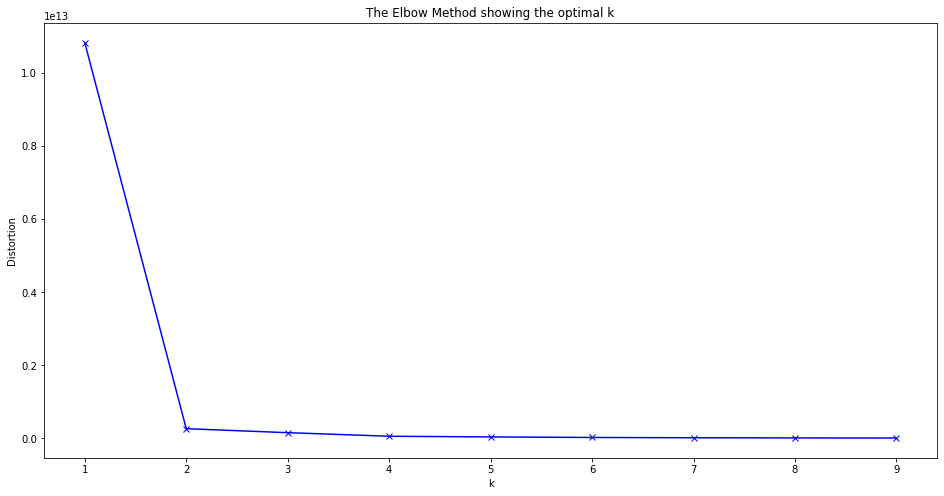

In [27]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [28]:
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(df_num_nan)

KMeans(n_clusters=2)

In [29]:
# préparation des données pour le clustering
X = df_num_nan.values
names = df_num_nan.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Nombre de clusters souhaités
n_clust = 2

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_
clusters

mesure = df_num_nan.copy()
mesure['cluster'] = clusters
mesure

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,saturated-fat_100g,carbohydrates_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,cluster
0,0.00,0.0,0.000,0.00,0.0,0.00,0.000,0.00,0.0,0.0000,0.000,0.00000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1
1,28.57,0.0,0.018,14.29,3.6,3.57,0.000,0.00,0.0,0.0214,0.000,0.00129,14.0,14.0,28.57,64.29,0.0,0.0,0.0,2243.0,0
2,17.86,0.0,0.000,17.86,7.1,17.86,0.635,0.25,0.0,0.0000,0.071,0.00129,0.0,0.0,0.00,60.71,0.0,0.0,0.0,1941.0,1
4,1.43,0.0,0.000,0.00,5.7,8.57,0.000,0.00,0.0,0.0000,0.000,0.00000,0.0,0.0,0.00,77.14,0.0,0.0,0.0,1552.0,1
5,18.27,0.0,0.000,11.54,7.7,13.46,0.000,0.00,0.0,0.0000,0.038,0.00346,0.0,0.0,1.92,63.46,0.0,0.0,0.0,1933.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,0.00,0.0,0.000,0.00,0.0,0.00,0.000,0.00,0.0,0.0000,0.000,0.00000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1
320768,0.00,0.0,0.000,0.00,0.0,0.00,0.000,0.00,0.0,0.0000,0.000,0.00000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1
320769,0.00,0.0,0.000,0.00,0.0,0.00,0.000,0.00,0.0,0.0000,0.000,0.00000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1
320770,0.00,0.0,0.000,0.00,0.0,0.00,0.000,0.00,0.0,0.0000,0.000,0.00000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1


/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


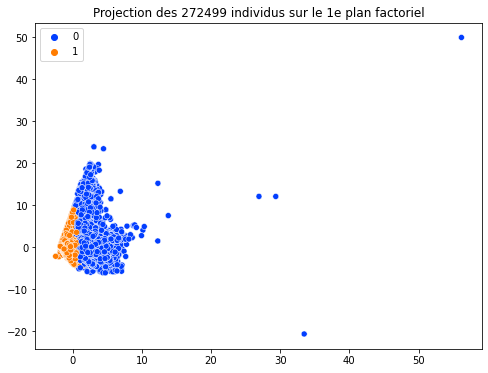

In [30]:
# choix du nombre et des composantes à calculer
n_comp = df_num_nan.shape[1]
features = mesure.columns

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Affichage du clustering par projection des individus sur le premier plan factoriel
X_projected = pca.transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(X_projected[:, 0], X_projected[:, 1], hue=clusters, cmap = 'jet', palette="bright")
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

In [31]:
mesure.groupby('cluster').mean()

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,saturated-fat_100g,carbohydrates_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g
cluster,,,,,,,,,,,,,,,,,,,,
0,14.569425,0.061494,0.015763,14.952213,2.337540,8.998692,2.223022,0.944377,0.000109,0.004735,0.077054,0.002858,13.094921,13.242982,6.338721,35.045881,2.307479,0.027343,0.081163,1474.881329
1,1.885031,0.002207,0.003329,5.459477,1.211541,3.395982,0.487372,0.191878,0.000082,0.007066,0.016515,0.000731,0.997522,0.829471,0.481584,13.979652,1.118493,0.004179,0.026274,421.710178


In [32]:
mesure = mesure.fillna(mesure.groupby('cluster').transform('mean'))
mesure

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,saturated-fat_100g,carbohydrates_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,cluster
0,0.00,0.0,0.000,0.00,0.0,0.00,0.000,0.00,0.0,0.0000,0.000,0.00000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1
1,28.57,0.0,0.018,14.29,3.6,3.57,0.000,0.00,0.0,0.0214,0.000,0.00129,14.0,14.0,28.57,64.29,0.0,0.0,0.0,2243.0,0
2,17.86,0.0,0.000,17.86,7.1,17.86,0.635,0.25,0.0,0.0000,0.071,0.00129,0.0,0.0,0.00,60.71,0.0,0.0,0.0,1941.0,1
4,1.43,0.0,0.000,0.00,5.7,8.57,0.000,0.00,0.0,0.0000,0.000,0.00000,0.0,0.0,0.00,77.14,0.0,0.0,0.0,1552.0,1
5,18.27,0.0,0.000,11.54,7.7,13.46,0.000,0.00,0.0,0.0000,0.038,0.00346,0.0,0.0,1.92,63.46,0.0,0.0,0.0,1933.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,0.00,0.0,0.000,0.00,0.0,0.00,0.000,0.00,0.0,0.0000,0.000,0.00000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1
320768,0.00,0.0,0.000,0.00,0.0,0.00,0.000,0.00,0.0,0.0000,0.000,0.00000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1
320769,0.00,0.0,0.000,0.00,0.0,0.00,0.000,0.00,0.0,0.0000,0.000,0.00000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1
320770,0.00,0.0,0.000,0.00,0.0,0.00,0.000,0.00,0.0,0.0000,0.000,0.00000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1


### 2. Avec la fonction predict

In [33]:
df_train = df_outliers_num.copy()
df_train = df_train.dropna()
df_train

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,saturated-fat_100g,carbohydrates_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g
1,28.57,0.0,0.018,14.29,3.6,3.57,0.00000,0.000,0.000000,0.0214,0.000,0.00129,14.0,14.0,28.57,64.29,0.0,0.0,0.0,2243.0
2,17.86,0.0,0.000,17.86,7.1,17.86,0.63500,0.250,0.000000,0.0000,0.071,0.00129,0.0,0.0,0.00,60.71,0.0,0.0,0.0,1941.0
77,10.91,0.0,0.000,25.45,5.5,9.09,0.25400,0.100,0.000000,0.0000,0.036,0.00262,6.0,6.0,0.91,74.55,0.0,0.0,0.0,1824.0
146,0.00,0.0,0.000,66.67,10.0,0.00,0.00000,0.000,0.000000,0.0000,0.000,0.00000,8.0,8.0,0.00,83.33,0.0,0.0,0.0,1255.0
147,0.00,0.0,0.000,52.50,7.5,2.50,0.00000,0.000,0.001125,0.0000,0.050,0.00360,8.0,8.0,0.00,62.50,1.0,0.0,0.0,1046.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320647,13.64,0.0,0.009,9.09,4.6,9.09,1.82372,0.718,0.000000,0.0000,0.000,0.00082,13.0,13.0,4.55,72.73,2.0,0.0,0.0,1845.0
320664,0.00,0.0,0.000,6.67,10.0,0.00,3.21818,1.267,0.001500,0.0000,0.000,0.00240,6.0,6.0,0.00,16.67,0.0,0.0,0.0,280.0
320665,5.33,0.0,0.007,0.00,2.0,4.67,1.37160,0.540,0.000060,0.0040,0.027,0.00120,2.0,2.0,1.00,13.33,0.0,0.0,0.0,502.0
320738,9.72,0.0,0.000,30.56,8.3,5.56,0.95250,0.375,0.000250,0.0583,0.556,0.00500,11.0,11.0,2.78,61.11,1.0,0.0,0.0,1393.0


In [34]:
df_test = df_outliers_num.copy()
df_test = df_test[df_test.isna().any(axis=1)]
df_test

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,saturated-fat_100g,carbohydrates_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.43,NaN,NaN,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.14,0.0,0.0,0.0,1552.0
5,18.27,NaN,NaN,11.54,7.7,13.46,NaN,NaN,NaN,NaN,0.038,0.00346,NaN,NaN,1.92,63.46,0.0,0.0,0.0,1933.0
6,NaN,NaN,NaN,NaN,NaN,8.89,NaN,NaN,NaN,0.0027,0.044,NaN,NaN,NaN,NaN,80.00,0.0,0.0,0.0,1490.0
7,18.75,NaN,NaN,15.62,9.4,14.06,0.1397,0.055,NaN,NaN,0.062,0.00422,7.0,7.0,4.69,57.81,2.0,0.0,0.0,1833.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_train)
    distortions.append(kmeanModel.inertia_)

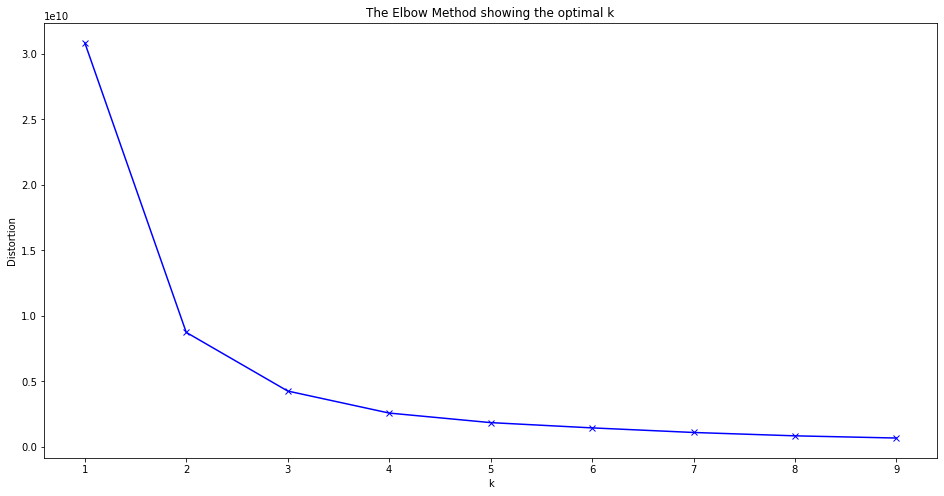

In [36]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [37]:
# préparation des données pour le clustering
X = df_train.values
names = df_train.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Nombre de clusters souhaités
n_clust = 3

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_
clusters

mesure = df_train.copy()
mesure['cluster'] = clusters
mesure

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,saturated-fat_100g,carbohydrates_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,cluster
1,28.57,0.0,0.018,14.29,3.6,3.57,0.00000,0.000,0.000000,0.0214,0.000,0.00129,14.0,14.0,28.57,64.29,0.0,0.0,0.0,2243.0,0
2,17.86,0.0,0.000,17.86,7.1,17.86,0.63500,0.250,0.000000,0.0000,0.071,0.00129,0.0,0.0,0.00,60.71,0.0,0.0,0.0,1941.0,1
77,10.91,0.0,0.000,25.45,5.5,9.09,0.25400,0.100,0.000000,0.0000,0.036,0.00262,6.0,6.0,0.91,74.55,0.0,0.0,0.0,1824.0,1
146,0.00,0.0,0.000,66.67,10.0,0.00,0.00000,0.000,0.000000,0.0000,0.000,0.00000,8.0,8.0,0.00,83.33,0.0,0.0,0.0,1255.0,1
147,0.00,0.0,0.000,52.50,7.5,2.50,0.00000,0.000,0.001125,0.0000,0.050,0.00360,8.0,8.0,0.00,62.50,1.0,0.0,0.0,1046.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320647,13.64,0.0,0.009,9.09,4.6,9.09,1.82372,0.718,0.000000,0.0000,0.000,0.00082,13.0,13.0,4.55,72.73,2.0,0.0,0.0,1845.0,1
320664,0.00,0.0,0.000,6.67,10.0,0.00,3.21818,1.267,0.001500,0.0000,0.000,0.00240,6.0,6.0,0.00,16.67,0.0,0.0,0.0,280.0,2
320665,5.33,0.0,0.007,0.00,2.0,4.67,1.37160,0.540,0.000060,0.0040,0.027,0.00120,2.0,2.0,1.00,13.33,0.0,0.0,0.0,502.0,2
320738,9.72,0.0,0.000,30.56,8.3,5.56,0.95250,0.375,0.000250,0.0583,0.556,0.00500,11.0,11.0,2.78,61.11,1.0,0.0,0.0,1393.0,1


/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


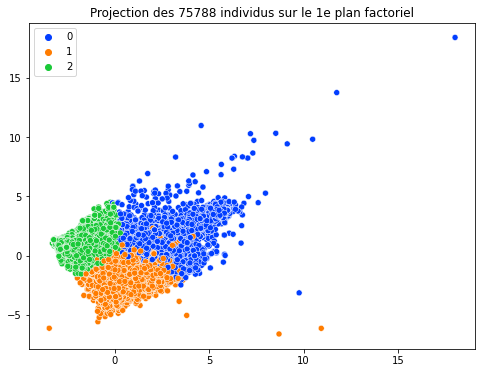

In [38]:
# choix du nombre et des composantes à calculer
n_comp = df_train.shape[1]
features = mesure.columns

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Affichage du clustering par projection des individus sur le premier plan factoriel
X_projected = pca.transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(X_projected[:, 0], X_projected[:, 1], hue=clusters, cmap = 'jet', palette="bright")
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

In [39]:
# Splitting the dataset
X_train = mesure.drop(['cluster'],axis=1) 
Y_train = mesure['cluster']
X_test = df_test.fillna(mesure.mean())
df_test_clust = df_test.copy()

# Predictions on Testing data
model = km.fit(X_train,Y_train)
predict = model.predict(X_test) 
df_test_clust['cluster'] = predict
df_test_clust

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,saturated-fat_100g,carbohydrates_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,cluster
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,1.43,NaN,NaN,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.14,0.0,0.0,0.0,1552.0,1
5,18.27,NaN,NaN,11.54,7.7,13.46,NaN,NaN,NaN,NaN,0.038,0.00346,NaN,NaN,1.92,63.46,0.0,0.0,0.0,1933.0,1
6,NaN,NaN,NaN,NaN,NaN,8.89,NaN,NaN,NaN,0.0027,0.044,NaN,NaN,NaN,NaN,80.00,0.0,0.0,0.0,1490.0,1
7,18.75,NaN,NaN,15.62,9.4,14.06,0.1397,0.055,NaN,NaN,0.062,0.00422,7.0,7.0,4.69,57.81,2.0,0.0,0.0,1833.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
320769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
320770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [40]:
predict_cluster = pd.concat([df_test_clust, mesure])
predict_cluster

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,saturated-fat_100g,carbohydrates_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,cluster
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,1.43,NaN,NaN,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.14,0.0,0.0,0.0,1552.0,1
5,18.27,NaN,NaN,11.54,7.7,13.46,NaN,NaN,NaN,NaN,0.038,0.00346,NaN,NaN,1.92,63.46,0.0,0.0,0.0,1933.0,1
6,NaN,NaN,NaN,NaN,NaN,8.89,NaN,NaN,NaN,0.0027,0.044,NaN,NaN,NaN,NaN,80.00,0.0,0.0,0.0,1490.0,1
7,18.75,NaN,NaN,15.62,9.4,14.06,0.13970,0.055,NaN,NaN,0.062,0.00422,7.0,7.0,4.69,57.81,2.0,0.0,0.0,1833.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320647,13.64,0.0,0.009,9.09,4.6,9.09,1.82372,0.718,0.00000,0.0000,0.000,0.00082,13.0,13.0,4.55,72.73,2.0,0.0,0.0,1845.0,1
320664,0.00,0.0,0.000,6.67,10.0,0.00,3.21818,1.267,0.00150,0.0000,0.000,0.00240,6.0,6.0,0.00,16.67,0.0,0.0,0.0,280.0,2
320665,5.33,0.0,0.007,0.00,2.0,4.67,1.37160,0.540,0.00006,0.0040,0.027,0.00120,2.0,2.0,1.00,13.33,0.0,0.0,0.0,502.0,2
320738,9.72,0.0,0.000,30.56,8.3,5.56,0.95250,0.375,0.00025,0.0583,0.556,0.00500,11.0,11.0,2.78,61.11,1.0,0.0,0.0,1393.0,1


In [41]:
predict_cluster = predict_cluster.fillna(predict_cluster.groupby('cluster').transform('mean'))
predict_cluster

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,saturated-fat_100g,carbohydrates_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,cluster
0,6.404192,0.018053,0.011916,10.770116,2.191881,6.689473,1.284853,0.511652,0.000149,0.013808,0.059378,0.002267,6.046228,6.175995,2.554738,24.264465,1.912382,0.013229,0.068872,772.025841,2
4,1.430000,0.087863,0.006972,19.337375,5.700000,8.570000,1.331328,0.525988,0.000167,0.012027,0.079415,0.005182,12.298631,12.413929,4.579569,77.140000,0.000000,0.000000,0.000000,1552.000000,1
5,18.270000,0.087863,0.006972,11.540000,7.700000,13.460000,1.331328,0.525988,0.000167,0.012027,0.038000,0.003460,12.298631,12.413929,1.920000,63.460000,0.000000,0.000000,0.000000,1933.000000,1
6,12.715708,0.087863,0.006972,19.337375,4.416551,8.890000,1.331328,0.525988,0.000167,0.002700,0.044000,0.005182,12.298631,12.413929,4.579569,80.000000,0.000000,0.000000,0.000000,1490.000000,1
7,18.750000,0.087863,0.006972,15.620000,9.400000,14.060000,0.139700,0.055000,0.000167,0.012027,0.062000,0.004220,7.000000,7.000000,4.690000,57.810000,2.000000,0.000000,0.000000,1833.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320647,13.640000,0.000000,0.009000,9.090000,4.600000,9.090000,1.823720,0.718000,0.000000,0.000000,0.000000,0.000820,13.000000,13.000000,4.550000,72.730000,2.000000,0.000000,0.000000,1845.000000,1
320664,0.000000,0.000000,0.000000,6.670000,10.000000,0.000000,3.218180,1.267000,0.001500,0.000000,0.000000,0.002400,6.000000,6.000000,0.000000,16.670000,0.000000,0.000000,0.000000,280.000000,2
320665,5.330000,0.000000,0.007000,0.000000,2.000000,4.670000,1.371600,0.540000,0.000060,0.004000,0.027000,0.001200,2.000000,2.000000,1.000000,13.330000,0.000000,0.000000,0.000000,502.000000,2
320738,9.720000,0.000000,0.000000,30.560000,8.300000,5.560000,0.952500,0.375000,0.000250,0.058300,0.556000,0.005000,11.000000,11.000000,2.780000,61.110000,1.000000,0.000000,0.000000,1393.000000,1


In [42]:
df_string_final = df_outliers.select_dtypes(include=[object])
df_final = predict_cluster.merge(df_string_final ,left_index = True, right_index = True, how='left')
df_final

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,saturated-fat_100g,carbohydrates_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,cluster,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives,additives_tags,additives_fr,nutrition_grade_fr,states,states_tags,states_fr
0,6.404192,0.018053,0.011916,10.770116,2.191881,6.689473,1.284853,0.511652,0.000149,0.013808,0.059378,0.002267,6.046228,6.175995,2.554738,24.264465,1.912382,0.013229,0.068872,772.025841,2,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com..."
4,1.430000,0.087863,0.006972,19.337375,5.700000,8.570000,1.331328,0.525988,0.000167,0.012027,0.079415,0.005182,12.298631,12.413929,4.579569,77.140000,0.000000,0.000000,0.000000,1552.000000,1,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,Organic polenta,35 g (0.25 cup),[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
5,18.270000,0.087863,0.006972,11.540000,7.700000,13.460000,1.331328,0.525988,0.000167,0.012027,0.038000,0.003460,12.298631,12.413929,1.920000,63.460000,0.000000,0.000000,0.000000,1933.000000,1,0000000016100,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,unfi,US,en:united-states,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),[ rolled-oats -> en:rolled-oats ] [ oats ->...,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
6,12.715708,0.087863,0.006972,19.337375,4.416551,8.890000,1.331328,0.525988,0.000167,0.002700,0.044000,0.005182,12.298631,12.413929,4.579569,80.000000,0.000000,0.000000,0.000000,1490.000000,1,0000000016117,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055730,2017-03-09T10:35:30Z,1489055730,2017-03-09T10:35:30Z,Organic Long Grain White Rice,Lundberg,lundberg,US,en:united-states,États-Unis,Organic long grain white rice,45 g (0.25 cup),[ organic-long-grain-white-rice -> en:organic...,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
7,18.750000,0.087863,0.006972,15.620000,9.400000,14.060000,0.139700,0.055000,0.000167,0.012027,0.062000,0.004220,7.000000,7.000000,4.690000,57.810000,2.000000,0.000000,0.000000,1833.000000,1,0000000016124,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,Daddy's Muesli,daddy-s-muesli,US,en:united-states,États-Unis,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),[ org-oats -> en:org-oats ] [ oats -> en:oa...,"en:e123,en:e307a","E123 - Amarante,E307a - Tocophérol",c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
...,...,...,...,...,...,

In [43]:
df_final.to_csv("P3_final_cluster.csv", index=False)

### C) Par la méthode du K-NN

In [44]:
k_NN = df_outliers.copy()
k_NN.isna().sum().sum()

2839412

In [55]:
df_outliers[df_outliers['nutrition_grade_fr'].notna()]

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,saturated-fat_100g,carbohydrates_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives,additives_tags,additives_fr,nutrition_grade_fr,states,states_tags,states_fr
1,28.57,0.0,0.018,14.29,3.6,3.57,0.00000,0.000000,0.000000,0.0214,0.000,0.00129,14.0,14.0,28.57,64.29,0.0,0.0,0.0,2243.0,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
2,17.86,0.0,0.000,17.86,7.1,17.86,0.63500,0.250000,0.000000,0.0000,0.071,0.00129,0.0,0.0,0.00,60.71,0.0,0.0,0.0,1941.0,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
7,18.75,NaN,NaN,15.62,9.4,14.06,0.13970,0.055000,NaN,NaN,0.062,0.00422,7.0,7.0,4.69,57.81,2.0,0.0,0.0,1833.0,0000000016124,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,Daddy's Muesli,daddy-s-muesli,US,en:united-states,États-Unis,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),[ org-oats -> en:org-oats ] [ oats -> en:oa...,"en:e123,en:e307a","E123 - Amarante,E307a - Tocophérol",c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
12,36.67,NaN,NaN,3.33,6.7,16.67,1.60782,0.633000,NaN,NaN,0.133,0.00360,12.0,12.0,5.00,36.67,1.0,0.0,0.0,2230.0,0000000016872,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055650,2017-03-09T10:34:10Z,1489055651,2017-03-09T10:34:11Z,Zen Party Mix,Sunridge,sunridge,US,en:united-states,États-Unis,"Roasted peanuts (peanuts, peanut or canola oil...",30 g (0.25 cup),[ roasted-peanuts -> en:roasted-peanuts ] [...,en:e100,E100 - Curcumine,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
15,18.18,NaN,NaN,21.82,9.1,14.55,0.02286,0.009000,0.000273,NaN,NaN,0.00131,0.0,0.0,1.82,60.00,0.0,0.0,0.0,1824.0,0000000018012,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055652,2017-03-09T10:34:12Z,1489055653,2017-03-09T10:34:13Z,Cinnamon Nut Granola,Grizzlies,grizzlies,US,en:united-states,États-Unis,"Organic rolled oats, honey, raisins, almonds, ...",55 g (0.5 cup),[ organic-rolled-oats -> en:organic-rolled-oa...,NaN,NaN,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320742,0.00,0.0,0.000,2.35,4.7,1.18,0.03048,0.012000,0.000000,0.0000,0.000,0.00127,NaN,NaN,0.00,87.06,0.0,0.0,0.0,1477.

In [45]:
# Séléction des valeurs non nulles pour le nutriscore (objectif : réduire le dataframe pour le K-NN)
k_NN = k_NN[k_NN['nutrition_grade_fr'].notna()]
k_NN = k_NN._get_numeric_data()
k_NN

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,saturated-fat_100g,carbohydrates_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g
1,28.57,0.0,0.018,14.29,3.6,3.57,0.00000,0.000000,0.000000,0.0214,0.000,0.00129,14.0,14.0,28.57,64.29,0.0,0.0,0.0,2243.0
2,17.86,0.0,0.000,17.86,7.1,17.86,0.63500,0.250000,0.000000,0.0000,0.071,0.00129,0.0,0.0,0.00,60.71,0.0,0.0,0.0,1941.0
7,18.75,NaN,NaN,15.62,9.4,14.06,0.13970,0.055000,NaN,NaN,0.062,0.00422,7.0,7.0,4.69,57.81,2.0,0.0,0.0,1833.0
12,36.67,NaN,NaN,3.33,6.7,16.67,1.60782,0.633000,NaN,NaN,0.133,0.00360,12.0,12.0,5.00,36.67,1.0,0.0,0.0,2230.0
15,18.18,NaN,NaN,21.82,9.1,14.55,0.02286,0.009000,0.000273,NaN,NaN,0.00131,0.0,0.0,1.82,60.00,0.0,0.0,0.0,1824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320742,0.00,0.0,0.000,2.35,4.7,1.18,0.03048,0.012000,0.000000,0.0000,0.000,0.00127,NaN,NaN,0.00,87.06,0.0,0.0,0.0,1477.0
320751,2.80,NaN,NaN,2.60,5.9,13.00,0.68000,0.267717,NaN,NaN,NaN,0.00380,NaN,NaN,0.60,74.80,NaN,NaN,NaN,1643.0
320757,NaN,NaN,NaN,3.89,12.2,21.22,0.10000,0.039370,NaN,NaN,NaN,NaN,0.0,0.0,3.73,NaN,NaN,NaN,NaN,2406.0
320763,0.20,NaN,NaN,0.50,0.2,0.50,0.02540,0.010000,NaN,NaN,NaN,NaN,2.0,0.0,0.20,0.50,0.0,0.0,0.0,21.0


k_NN, k_NN_test = train_test_split(k_NN, test_size=0.80, random_state=42, shuffle=True)  
k_NN  

In [46]:
# define imputer
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')

In [47]:
# fit on the dataset
imputer.fit(k_NN)

KNNImputer(n_neighbors=3)

In [48]:
# transform the dataset
K_NN_OK = imputer.transform(k_NN)

In [49]:
K_NN_OK

array([[2.857e+01, 0.000e+00, 1.800e-02, ..., 0.000e+00, 0.000e+00,
        2.243e+03],
       [1.786e+01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.941e+03],
       [1.875e+01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.833e+03],
       ...,
       [5.000e+01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.406e+03],
       [2.000e-01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.100e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [50]:
k_NN_imputed = pd.DataFrame (K_NN_OK, columns = k_NN.columns)
k_NN_imputed

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,saturated-fat_100g,carbohydrates_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g
0,28.57,0.0,0.018,14.29,3.6,3.57,0.00000,0.000000,0.000000,0.021400,0.000000,0.00129,14.0,14.0,28.57,64.29,0.000000,0.0,0.0,2243.0
1,17.86,0.0,0.000,17.86,7.1,17.86,0.63500,0.250000,0.000000,0.000000,0.071000,0.00129,0.0,0.0,0.00,60.71,0.000000,0.0,0.0,1941.0
2,18.75,0.0,0.000,15.62,9.4,14.06,0.13970,0.055000,0.000000,0.002067,0.062000,0.00422,7.0,7.0,4.69,57.81,2.000000,0.0,0.0,1833.0
3,36.67,0.0,0.000,3.33,6.7,16.67,1.60782,0.633000,0.000067,0.000000,0.133000,0.00360,12.0,12.0,5.00,36.67,1.000000,0.0,0.0,2230.0
4,18.18,0.0,0.000,21.82,9.1,14.55,0.02286,0.009000,0.000273,0.005467,0.072667,0.00131,0.0,0.0,1.82,60.00,0.000000,0.0,0.0,1824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174819,0.00,0.0,0.000,2.35,4.7,1.18,0.03048,0.012000,0.000000,0.000000,0.000000,0.00127,0.0,0.0,0.00,87.06,0.000000,0.0,0.0,1477.0
174820,2.80,0.0,0.000,2.60,5.9,13.00,0.68000,0.267717,0.000000,0.000000,0.143000,0.00380,7.0,7.0,0.60,74.80,0.000000,0.0,0.0,1643.0
174821,50.00,0.0,0.000,3.89,12.2,21.22,0.10000,0.039370,0.000000,0.000700,0.202333,0.00493,0.0,0.0,3.73,20.24,0.333333,0.0,0.0,2406.0
174822,0.20,0.0,0.000,0.50,0.2,0.50,0.02540,0.010000,0.000004,0.002500,0.000000,0.00041,2.0,0.0,0.20,0.50,0.000000,0.0,0.0,21.0


In [63]:
df_post_string = df_string_final[df_string_final['nutrition_grade_fr'].notna()]
df_post_string = df_post_string.reset_index()
df_post_string

,index,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives,additives_tags,additives_fr,nutrition_grade_fr,states,states_tags,states_fr
0,1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
1,2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
2,7,0000000016124,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,Daddy's Muesli,daddy-s-muesli,US,en:united-states,États-Unis,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),[ org-oats -> en:org-oats ] [ oats -> en:oa...,"en:e123,en:e307a","E123 - Amarante,E307a - Tocophérol",c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
3,12,0000000016872,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055650,2017-03-09T10:34:10Z,1489055651,2017-03-09T10:34:11Z,Zen Party Mix,Sunridge,sunridge,US,en:united-states,États-Unis,"Roasted peanuts (peanuts, peanut or canola oil...",30 g (0.25 cup),[ roasted-peanuts -> en:roasted-peanuts ] [...,en:e100,E100 - Curcumine,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
4,15,0000000018012,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055652,2017-03-09T10:34:12Z,1489055653,2017-03-09T10:34:13Z,Cinnamon Nut Granola,Grizzlies,grizzlies,US,en:united-states,États-Unis,"Organic rolled oats, honey, raisins, almonds, ...",55 g (0.5 cup),[ organic-rolled-oats -> en:organic-rolled-oa...,NaN,NaN,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174819,320742,9787461062105,http://world-fr.openfoodfacts.org/produit/9787...,usda-ndb-import,1489092300,2017-03-09T20:45:00Z,1489092300,2017-03-09T20:45:00Z,Natural Cassava,Industria De Casabe Paul,industria-de-casabe-paul,US,en:united-states,États-Unis,Cassava.,85 g (85 GRM),[ cassava -> en:cassava ],NaN,NaN,a,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
174820,320751,9847548283004,http://world-fr.openfoodfacts.org/produit/9847...,drmalabar,1437817626,2015-07-25T09:47:06Z,1442237848,2015-09-14T13:37:28Z,Tartines craquantes bio au sarrasin,Le Pain des fleurs,le-pain-des-fleurs,France,en:france,France,NaN,NaN,NaN,NaN,NaN,a,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
174821,320757,9900000000233,http://world-fr.openfoodfacts.org/produit/9900...,kiliweb,1491079938,2017-04-01T20:52:18Z,1491079939,2017-04-01T20:52:19Z,Amandes,Biosic,biosic,F

In [65]:
KNN_final = k_NN_imputed.merge(df_post_string ,left_index = True, right_index = True, how='left')
KNN_final

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,saturated-fat_100g,carbohydrates_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,index,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives,additives_tags,additives_fr,nutrition_grade_fr,states,states_tags,states_fr
0,28.57,0.0,0.018,14.29,3.6,3.57,0.00000,0.000000,0.000000,0.021400,0.000000,0.00129,14.0,14.0,28.57,64.29,0.000000,0.0,0.0,2243.0,1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
1,17.86,0.0,0.000,17.86,7.1,17.86,0.63500,0.250000,0.000000,0.000000,0.071000,0.00129,0.0,0.0,0.00,60.71,0.000000,0.0,0.0,1941.0,2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
2,18.75,0.0,0.000,15.62,9.4,14.06,0.13970,0.055000,0.000000,0.002067,0.062000,0.00422,7.0,7.0,4.69,57.81,2.000000,0.0,0.0,1833.0,7,0000000016124,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,Daddy's Muesli,daddy-s-muesli,US,en:united-states,États-Unis,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),[ org-oats -> en:org-oats ] [ oats -> en:oa...,"en:e123,en:e307a","E123 - Amarante,E307a - Tocophérol",c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
3,36.67,0.0,0.000,3.33,6.7,16.67,1.60782,0.633000,0.000067,0.000000,0.133000,0.00360,12.0,12.0,5.00,36.67,1.000000,0.0,0.0,2230.0,12,0000000016872,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055650,2017-03-09T10:34:10Z,1489055651,2017-03-09T10:34:11Z,Zen Party Mix,Sunridge,sunridge,US,en:united-states,États-Unis,"Roasted peanuts (peanuts, peanut or canola oil...",30 g (0.25 cup),[ roasted-peanuts -> en:roasted-peanuts ] [...,en:e100,E100 - Curcumine,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
4,18.18,0.0,0.000,21.82,9.1,14.55,0.02286,0.009000,0.000273,0.005467,0.072667,0.00131,0.0,0.0,1.82,60.00,0.000000,0.0,0.0,1824.0,15,0000000018012,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055652,2017-03-09T10:34:12Z,1489055653,2017-03-09T10:34:13Z,Cinnamon Nut Granola,Grizzlies,grizzlies,US,en:united-states,États-Unis,"Organic rolled oats, honey, raisins, almonds, ...",55 g (0.5 cup),[ organic-rolled-oats -> en:organic-rolled-oa...,NaN,NaN,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174819,0.00,0.0,0.000,

In [66]:
KNN_final.to_csv("P3_final_KNN.csv", index=False)